## EDA Pt. 2

The purpose of this notebook is to read back in the dataset I created in the EDA/Time Series Notebook, and conduct further EDA.

In [41]:
import json
import requests
from bs4 import BeautifulSoup
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np

%matplotlib inline

In [42]:
df = pd.read_csv('cleaned_games_dataset.csv', index_col='Unnamed: 0', parse_dates=['game_date'])

In [43]:
df.head()

fg_1_1  fga_1_1  fg%_1_1  3p_1_1  3pa_1_1  3p%_1_1  ft_1_1  fta_1_1  \
1      31       78    0.397       7       23    0.304      28       38   
2      37       70    0.529      11       27    0.407      18       27   
5      31       72    0.431       6       21    0.286      27       33   
6      30       71    0.423       8       21    0.381      34       42   
9      35       79    0.443       7       16    0.438      13       15   

   ft%_1_1  orb_1_1       ...         pts_2_3_opp  home_2_3_opp  \
1    0.737       18       ...                 114             1   
2    0.667        8       ...                  87             0   
5    0.818       13       ...                  84             0   
6    0.810       16       ...                 102             1   
9    0.867       11       ...                  74             0   

   betting_line_2_3_opp  off_rating_1_3_opp  off_rating_2_3_opp  \
1                   9.5              110.75              114.78   
2                   8.0              101.62               95.06   
5                  -3.5               94.13               87.86   
6                  -3.5              101.45              108.92   
9                   8.0               93.25               77.54   

   over_under_3_opp  game_total_score_3_opp  days_1_back_opp  days_2_back_opp  \
1             195.0                     224                2                2   
2             189.5                     180                3                1   
5             188.0                     174                1                3   
6             195.0                     197                1                3   
9             188.0                     163                2                1   

   days_3_back_opp  
1                2  
2                2  
5                1  
6                1  
9                3  

[5 rows x 278 columns]

In [44]:
df.reset_index(drop=True, inplace=True)

In [46]:
df[['bet_won_over', 'bet_won_under','game_total_score', 'off_rating_1_1', 
    'off_rating_1_1_opp', 'off_rating_2_1', 'home_1', 'home_2']].corr()

bet_won_over  bet_won_under  game_total_score  \
bet_won_over            1.000000      -0.972633          0.677850   
bet_won_under          -0.972633       1.000000         -0.678123   
game_total_score        0.677850      -0.678123          1.000000   
off_rating_1_1          0.001458      -0.003411          0.092551   
off_rating_1_1_opp      0.001458      -0.003411          0.092551   
off_rating_2_1          0.000296      -0.002594          0.075798   
home_1                  0.000000       0.000000          0.000000   
home_2                  0.000000       0.000000          0.000000   

                    off_rating_1_1  off_rating_1_1_opp  off_rating_2_1  \
bet_won_over              0.001458            0.001458        0.000296   
bet_won_under            -0.003411           -0.003411       -0.002594   
game_total_score          0.092551            0.092551        0.075798   
off_rating_1_1            1.000000            0.006939        0.186794   
off_rating_1_1_opp        0.006939            1.000000        0.031609   
off_rating_2_1            0.186794            0.031609        1.000000   
home_1                   -0.001078            0.001078       -0.022116   
home_2                    0.001078           -0.001078        0.022116   

                      home_1    home_2  
bet_won_over        0.000000  0.000000  
bet_won_under       0.000000  0.000000  
game_total_score    0.000000  0.000000  
off_rating_1_1     -0.001078  0.001078  
off_rating_1_1_opp  0.001078 -0.001078  
off_rating_2_1     -0.022116  0.022116  
home_1              1.000000 -1.000000  
home_2             -1.000000  1.000000

#### Number of Overs

In [47]:
df['bet_won_over'].value_counts()

0    6042
1    5780
Name: bet_won_over, dtype: int64

In [48]:
'{:.1%}'.format(df['bet_won_over'].value_counts()[1]/len(df))

'48.9%'

#### Number of Unders

In [49]:
df['bet_won_under'].value_counts()

0    5944
1    5878
Name: bet_won_under, dtype: int64

In [50]:
'{:.1%}'.format(df['bet_won_under'].value_counts()[1]/len(df))

'49.7%'

#### Number of Pushes

Following cell is the # of pushes for the 5 seasons of NBA games I've collected, as well the % of games for which a push occurred.

In [51]:
print(len(df[df['bet_won_over'] == df['bet_won_under']]), '\n', 
      '{:.1%}'.format((len(df[df['bet_won_over'] == df['bet_won_under']])/len(df))))

164 
 1.4%


In [53]:
df['O_U_P'] = ['0' for x in df['bet_won_under']]

In [54]:
for i, row in enumerate(df['O_U_P']):
    if df.loc[i, 'bet_won_over'] == 1:
        df.loc[i, 'O_U_P'] = 'O'
    elif df.loc[i, 'bet_won_under'] == 1:
        df.loc[i, 'O_U_P'] = 'U'
    else:
        df.loc[i, 'O_U_P'] = 'P'

The below plot show the frequency of over/under/push outcomes for all 5 NBA seasons represented in my data.

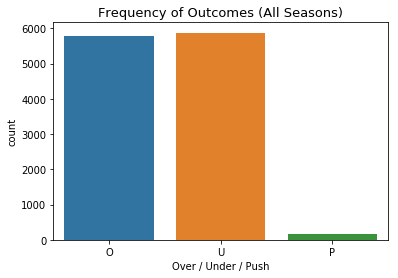

In [89]:
plt.figure(figsize=(6,4))
sns.countplot(x='O_U_P', data=df)
plt.title("Frequency of Outcomes (All Seasons)", fontsize=13)
plt.xlabel('Over / Under / Push');